Привет! Меня зовут Исмаилов Исмаил, я буду проверять твой проект :) Можешь обращаться ко мне на «ты». Если тебе комфортно, то и я буду к тебе так обращаться, если нет, то обязательно скажи об этом.

Пожалуйста, не удаляй мои комментарии, которые я буду оставлять в работе. Это особенно поможет, если твои проекты будут отправлены на повторную проверку. При повторных проверках у комментариев будут приписки: "Вторая итерация", "Третья итерация" и т.д. 

Ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались от моих: например, выделяй их своим любимым цветом — так у нас не возникнет путаницы :)

Кстати, про цвета! Мои комментарии будут в следующей цветовой гамме: зелеными, желтыми и красными. Например:

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
В случае, если решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
В случае, если решение может стать еще лучше с некоторыми корректировками </div>
 
<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Введение

    Описание проекта
    Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
    В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). 

    Цели
    Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

    Задачи
    Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

    Описание данных
    Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
    сalls — количество звонков,
    minutes — суммарная длительность звонков в минутах,
    messages — количество sms-сообщений,
    mb_used — израсходованный интернет-трафик в Мб,
    is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from joblib import dump

import numpy as np
import scipy.stats
import warnings
import graphviz
from tqdm import tqdm_notebook

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Хороший первичный анализ данных

## Разбейте данные на выборки

In [4]:
# разобьём данные на три выборки
df_train, df_test1 = train_test_split(df, test_size=0.4, random_state=12345)
df_test, df_valid=train_test_split(df_test1, test_size=0.5, random_state=12345)
print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

(1928, 5)
(643, 5)
(643, 5)


<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Выборки разделены верно, здорово, что проверены их размеры

## Исследуйте модели

In [5]:
# зададим признаки и целевые признаки 
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

### Cлучайное дерево

In [6]:
# рассмотрим гиперпараметр max_depth

best_model = None
best_result = 0
train_acc, test_acc = [], []
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_valid = model.predict(features_valid) # получите предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитайте качество модели
    if result > best_result:
        best_model = model
        best_result = result
#    print("max_depth =", depth, ": ", end='')
#    print(accuracy_score(target_valid, predictions_valid))
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))

# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)

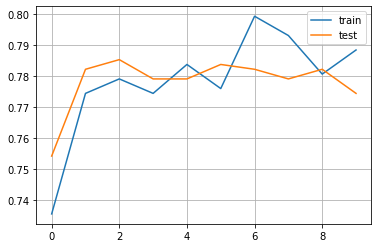

In [7]:
df_tree1 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_tree1.plot(grid=True)

plt.show()

# Вывод:
    1. увеличение значения параметра max_depth приводит к увеличению точности классификации на обучающей выборке
    2. с некоторого момента увеличение значения max_depth приводит к ухудшению точности на тестовой выборке, так как начинается стадия переобучения.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

Рассмотрен только один гиперпараметр. Хотелось бы побольше что-нибудь увидеть

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> добавил ниже изменение еще по двум гиперпараметрам min_samples_leaf, min_samples_split
        
        

In [8]:
# рассмотрим гиперпараметр min_samples_leaf

best_model = None
best_result = 0
train_acc, test_acc = [], []
for min_samples_leaf in [1, 2, 10, 15, 16, 17]:
    model = DecisionTreeClassifier(random_state=12345, min_samples_leaf = min_samples_leaf) # обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_valid = model.predict(features_valid) # получите предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитайте качество модели
    predictions = model.predict(features_valid)

    if result > best_result:
        best_model = model
        best_result = result
#    print("min_samples_leaf =", min_samples_leaf, ": ", end='')
#    print(accuracy_score(target_valid, predictions_valid))
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))

# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)


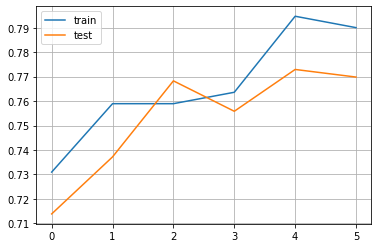

In [9]:
df_tree2 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_tree2.plot(grid=True)
plt.show()

# Вывод:

С увеличением значения min_samples_leaf качество на обучающей выборке возрастает, затем снижается и опять возрастает.
Получается, увеличение значения параметра min_samples_leaf — один из способов борьбы с переобучением при использовании решающих деревьев.

In [10]:
# рассмотрим гиперпараметр min_samples_split

best_model = None
best_result = 0
train_acc, test_acc = [], []
for min_samples_split in [2, 5, 10, 20, 25, 30]:
    model = DecisionTreeClassifier(random_state=12345, min_samples_split = min_samples_split) # обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_valid = model.predict(features_valid) # получите предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитайте качество модели
    if result > best_result:
        best_model = model
        best_result = result
#    print("min_samples_split =", min_samples_split, ": ", end='')
#    print(result)
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))
    
# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)

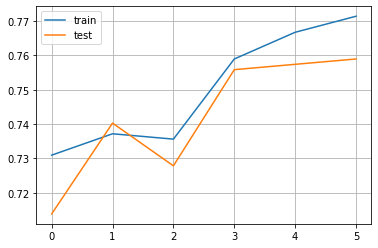

In [11]:
df_tree3 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_tree3.plot(grid=True)

plt.show()

# Вывод
Аналогично, с увеличением значения min_samples_split качество на обучающей выборке возрастает, затем снижается и опять возрастает. Получается, увеличение значения параметра min_samples_split — один из способов борьбы с переобучением при использовании решающих деревьев.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b> 
    
Лучше не выводить промежуточные результаты, это громоздко. Если хочешь посмотреть изменение метрики в зависимости от значения перебираемого параметра, то лучше построить график

### Cлучайный лес

In [12]:
# рассмотрим гиперпараметр n_estimators

best_model = None
best_result = 0
train_acc, test_acc = [], []
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    model.predict(features_valid)
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
    #print("min_samples_split =", min_samples_split, ": ", end='')
    #print(result)
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))
        
# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)

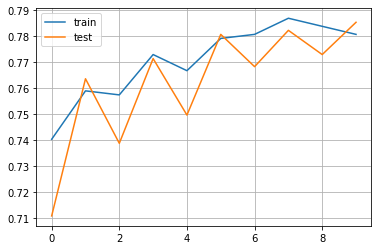

In [13]:
df_forest1 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_forest1.plot(grid=True)
plt.show()

# Вывод
Параметр n_estimators показывает количество деревьев в модели случайного леса. Видим, что качество модели сильно повышается при нечетных значениях количества деревьев.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

Аналогично с прошлым комментарием, у леса можно много чего глянуть

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> добавил ниже изменение еще по двум гиперпараметрам max_depth, min_samples_leaf

In [14]:
# рассмотрим гиперпараметр max_depth

best_model = None
best_result = 0
train_acc, test_acc = [], []
for depth in range(1, 11):
    model = RandomForestClassifier(random_state=12345, max_depth=depth) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    model.predict(features_valid)
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
#print("Accuracy наилучшей модели на валидационной выборке:", best_result)
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))
    
# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)

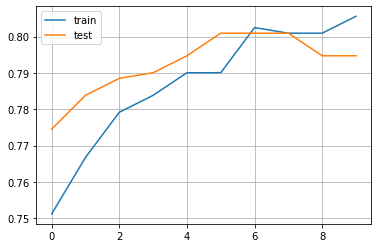

In [15]:
df_forest2 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_forest2.plot(grid=True)
plt.show()

# Вывод
    1. увеличение значения параметра max_depth приводит к увеличению точности классификации на обучающей выборке
    2. с некоторого момента увеличение значения max_depth приводит к ухудшению точности на тестовой выборке, так как начинается стадия переобучения.

In [16]:
# рассмотрим гиперпараметр min_samples_leaf

best_model = None
best_result = 0
train_acc, test_acc = [], []
for min_samples_leaf in range(1, 11):
    model = RandomForestClassifier(random_state=12345, min_samples_leaf=min_samples_leaf) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    model.predict(features_valid)
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
#print("Accuracy наилучшей модели на валидационной выборке:", best_result)
    train_acc.append(accuracy_score(target_valid, model.predict(features_valid)))
    test_acc.append(accuracy_score(target_test, model.predict(features_test)))
    
# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
#print("Тестовая выборка:", accuracy_test)

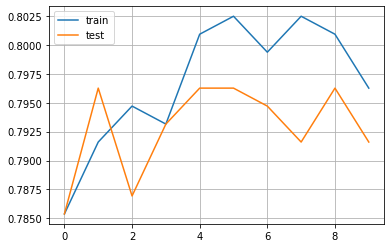

In [17]:
df_forest3 = pd.DataFrame(list(zip(train_acc, test_acc)), columns =['train', 'test'])
df_forest3.plot(grid=True)
plt.show()

# Вывод
C увеличением значения min_samples_leaf качество на обучающей выборке возрастает, затем снижается и опять возрастает. Получается, увеличение значения параметра min_samples_split — один из способов повышения точности модели, а также борьбы с переобучением при использовании решающих деревьев.

### Логистическая регрессия

Исследуем влияние разных алгоритмов на точность модели

In [19]:
# Напишите код здесь
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
model.predict(features_train)
result = model.score(features_train, target_train)
print("Обучающая выборка:", result)

# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
print("Тестовая выборка:", accuracy_test) # < допишите код здесь >

Обучающая выборка: 0.7131742738589212
Тестовая выборка: 0.7107309486780715


In [20]:
# Напишите код здесь
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
model.predict(features_train)
result = model.score(features_train, target_train)
print("Обучающая выборка:", result)

# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
print("Тестовая выборка:", accuracy_test) # < допишите код здесь >

Обучающая выборка: 0.7157676348547718
Тестовая выборка: 0.7091757387247278


In [21]:
# Напишите код здесь
model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=1000)
model.fit(features_train, target_train)
model.predict(features_train)
result = model.score(features_train, target_train)
print("Обучающая выборка:", result)

# < напишите здесь код расчёта на тестовой выборке >
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
print("Тестовая выборка:", accuracy_test) # < допишите код здесь >

Обучающая выборка: 0.7531120331950207
Тестовая выборка: 0.7558320373250389


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

# Вывод
 В зависимости от выбранного алгоритма может меняться точность модели, а также её обученность.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Тут тоже хотелось бы видеть перебор значений параметров

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> добавил

# Вывод:
# Лучшее значение accuracy показывает модель случайного леса.
# Благодаря различным значениям гиперпараметров можно влиять на точность модели и бороться с её переобученностью.

## (бонус) Проверьте модели на адекватность

In [ ]:
df_train['is_ultra'].count()

In [ ]:
df_train[df_train['is_ultra'] == 0]['is_ultra'].count()

In [ ]:
df_train[df_train['is_ultra'] == 1]['is_ultra'].count()

In [ ]:
(0.5*593 + 0.5*1335)/1928

# Вывод:
# предсказание случайной модели равно 0.5
# построенные модели адекватны

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Можно посмотреть на баланс классов: например, если у нас 90 процентов таргета это "1", а остальные 10 - "0", то мы можем тупо выдавать каждый раз цифру 1 и получать метрику 90 %. Любая модель, которая будет выдавать качество ниже этого - плохая/неадекватная

# Итоговый вывод:
наиболее точный результат показывает модель случайного леса

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b>

Хороший проект, тобою проделана большая работа, ты молодец!

Сперва похвалю за наличие везде промежуточных выводов, комментариев. Хороший код, показываешь навыки владения sklearn. Все требуемые пункты в задании в целом выполнены. Оставил пару желтых комментариев, думаю, это сможет улучшить твой проект. Также можно добавить визуализацию в проект: посмотреть на графиках, как влияет перебор параметров на результат нашей метрики

В этом проекте большое внимание уделяется подбору гиперпараметров, но это можно автоматизировать! Советую почитать на досуге про GridsearchCV и Optuna, будет полезно
    
Также отправляю ссылки на документации некоторых моделей для классификации: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
Что обязательно стоит доработать: посмотреть побольше гиперпараметров у решающего дерева и случайного леса, хотя бы 5 в совокупности должно получиться
    
Буду ждать доработок, удачи!

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация </b>

Все критические ошибки исправлены, проект стал еще лучше, принимаю. Успехов в дальнейшей учебе!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
